### TO-DO (FINISH ALL CODING AND VIZS BY TUESDAY):
- create more visualizations

    Completed:
        - pie chart comparing total 0's and 1's
        - text cleaning bar chart
        - bar chart comparing accuracies
        - distribution of tickers
    TBD:
        - pie charts w/ 0's and 1's, per company (qi)
        - tickers by industry, and visualizations split by 0's and 1's (marco)
        - visualize accuracy, precision, recall for each model (kelly)
        - bar chart/word cloud/some other visualization to show most important words (and function definition) (emily)
- pickle model (xin)
- written parts of final report
    1. Introduction: What is the project about? Why are you doing it? What are the potential applications it has? (kelly)
    2. Technical Approach: Explain your project framework/pipelines as a whole. Describe your performance metrics, databases, APIs etc. here (if any). Also discuss your data - what attributes does it have, where you got it from etc. (kelly(
    3. Methodology: Describe each component of your framework/pipeline. In Section 2 (Technical Approach), you're expected to give an overview of the architecture, and Section 3 describes each component and how it fits into your framework. (everyone)
    4. Results and Analysis: Present and explain all results in this section only. If you're profiling components, those results go in this section too. Include a link to your GitHub repos here. (emily)
    5. Sources: Cite your sources (marco)
    6. Appendix: Don't fill Sections 2-4 with all visualisations, only what you think are most relevant or the ones that best describe what you're trying to achieve. The appendix is meant for other diagrams and results.
- create a single transcript demo (xin)
- comment/clean up code (everyone)
- get larger database (xin)
    - add to existing
- hyperparameter tuning (kelly)
- README file (marco)

<center> <h3> DS 3500 — Fall 2021</h3> </center>
<center><h1> Natural Language Processing and Supervised Machine Learning Methods to Predict Stock Price Change from Earnings Call Transcripts </h1></center> 
<center><h4>  By: Qi Li, Kelly Phalen, Marco Tortolani, Emily Wang, Xinyu Wu </h4></center> 

## Outline
[1. PDFCleaner](#1.-PDFCleaner)

[2. StockPuller](#2.-StockPuller)

[3. PerformanceTester](#3.-PerformanceTester)

[4. Transcripts](#4.-Transcripts)

[5. Database](#5.-Database)

[6. Vectorizers](#6.-Vectorizers)

[7. Principal Component Analysis](#7.-Principal-Component-Analysis)

[8. Base Models](#8.-Base-Models)

[9. Hyperparameter Tuning](#9.-Hyperparameter-Tuning)

[10. Model Performance](#10.-Model-Performance)

[11. KFold Cross-Validation](#11.KFold-Cross-Validation)

[12. Visualizations](#12.-Visualizations)

## 1. PDFCleaner

In [4]:
import pdfplumber
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
import re

In [5]:
class PdfCleaner:
  def __init__ (self,pdf_file_path):
    self.__path__ = pdf_file_path
    text = ""
    with pdfplumber.open(self.__path__) as pdf:
      for i in range(len(pdf.pages)):
        page = pdf.pages[i]
        text = text + str(page.extract_text())
    self.__original_text__ = text
    self.__cleaned_text__= self.clean_stopwords_punctuation()
    self.__nonum_text__ = self.clean_nums()

  def lenBeforeClean(self):
    return len(self.__original_text__)

  def lenAfterClean(self):
    return len(self.__cleaned_text__)

  def print_originalText(self):
    print(self.__original_text__)

  def print_cleanedText(self):
    print(self.__cleaned_text__)

  def clean_stopwords_punctuation(self):
    cleaned_text = remove_stopwords(self.__original_text__)
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~©'''
    for ele in cleaned_text:
      if ele in punc:
         cleaned_text = cleaned_text.replace(ele, "")
    return cleaned_text

  def clean_nums(self):
    nonum_text = re.sub(r'\d+', '', self.__cleaned_text__)
    return nonum_text

## 2. StockPuller

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
 
class StockPuller:
    def __init__(self):
        self. tickerList = ['AAPL', 'ADBE', 'AMZN', 'ASML', 'AVGO', 'CMCSA', 'COST',  'CSCO', 'FB', 'GOOGL',
           'INTC', 'MSFT', 'NFLX', 'NVDA', 'PDD', 'PEP', 'PYPL', 'TMUS', 'TSLA', 'TXN']
       
    # get historical market data
    def plotAll(self):
        for ticker in self.tickerList:
            ticker = yf.Ticker(ticker)
            hist = ticker.history(period='5y', interval='1d')
            hist["Close"].plot(figsize=(16,9))
        plt.legend(self.tickerList)
        plt.show()
   
    def plotStock(self, ticker):
        stock = yf.Ticker(ticker)
        hist = stock.history(period='5y', interval='1d')
        hist["Close"].plot(figsize=(16,9))
        plt.legend([ticker])
        plt.show()
 
    def dailyData(self, ticker):
        stock = yf.Ticker(ticker)
        stockData = stock.history(period='5y',interval='1d')
        print(stockData)
 
    def changeOverDays(self, ticker, startDate, days):
        '''
        Returns the % change of a stocks value in a certan timeframe
 
        Parameters:
        ticker (str): stock ticker (ex. 'AAPL')
        startDate (str): the day which to start the comparison (ex. '2021-11-02')
        days (int): days that pass on which to compare closing values
       
        Bugfix:
        market isnt open on weekends
        '''
        stock = yf.Ticker(ticker)
        stockData = stock.history(period='5y', interval='1d')
 
        startDatetime = datetime.strptime(startDate, '%Y%m%d')
        endDatetime = startDatetime + timedelta(days=days)
        
        startPrice = stockData.loc[startDatetime]['Open']
        endPrice = stockData.loc[endDatetime]['Close']
        changeInPrice = startPrice / endPrice
        return changeInPrice - 1
 
    def changeOverHours(self, ticker, startDate, hours):
        '''
        Returns the % change of a stocks value in a certan timeframe
 
        Parameters:
        ticker (str): stock ticker (ex. 'AAPL')
        startDate (str): the day and time which to start the comparison (ex. '2021-11-02 11:30:00') NOTE: only put in 30 minute intervals
        hours (int): hours that pass on which to compare closing values
       
        Bugfix:
        market isnt open on weekends
        only takes in half hour inputs
        '''
        stock = yf.Ticker(ticker)
        stockData = stock.history(period='2y', interval='1h')
        stockData.index = stockData.index.tz_localize(None)
       
        # TO DO: limit to only allow times within market open/closing hours (9:30am-4:30pm)
        try:
            startDatetime = datetime.strptime(startDate, '%Y-%m-%d %H:%M:%S')
            endDatetime = startDatetime + timedelta(hours=hours)
        except:
            raise Exception('You are checking for time after market closing hours')
 
        startPrice = stockData.loc[startDatetime]['Open']
        endPrice = stockData.loc[endDatetime]['Close']
        changeInPrice = (startPrice / endPrice) - 1
        return changeInPrice

## 3. PerformanceTester

In [8]:
from os import error

In [9]:
class PerformanceTester:
    def __init__(self) -> None:
        articleData = []
       
        timeFrame = 'day'
        preferredTimespan = 1
   
    def loadArticles(self, articleList):
        '''
        Loads article data [ticker, date, transcript] into the PerformanceTester interior variable
 
        Parameters:
            articleList (list): a nested list in the form [ticker, date, transcript].This is stock ticker, the date of a report, and the transcript text
        '''
        self.articleData = articleList
   
    def setTimeframe(self, frame='day', span=1):
        '''
        Sets timeframe
 
        Parameters:
            frame (str): what unit (day or hour) are we using to look ahead
            span (int): how many units forward forward do you want the tester to test
        '''
        if frame == 'hour':
            self.timeframe = 'hour'
        elif frame == 'day':
            self.timeframe = 'day'
        else:
            raise Exception('invalid frame')
        self.preferredTimespan = span
   
    def aquireTargetValues(self):
        '''
        Creates x values (list of articles) and y values (list of stock price change after article release) for nlp training
        '''
        x_values = [article[2] for article in self.articleData]
        y_values = []
        Puller = StockPuller()
        for article in self.articleData:
            if self.timeframe == 'day':
                priceChange = Puller.changeOverDays(article[0], article[1], self.preferredTimespan)
            elif self.timeframe == 'hour':
                priceChange = Puller.changeOverHours(article[0], article[1], self.preferredTimespan)
            else:
                raise Exception('Please choose a reference type (\'hour\' or \'day\') using function setTimeframe')
            if priceChange >= 0:
                priceChange = 1
            else:
                priceChange = 0
            y_values.append(priceChange)
        return [x_values, y_values]

## 4. Transcripts

In [10]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import numpy as np
import requests
from pymongo import MongoClient

In [11]:
class Transcripts:
    def __init__(self, ticker):
        self.ticker = ticker
        xinyu = "/Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project"
        marco = "C:/Users/mtort/Repositories/DS3500-Final-Project"
        emily = "/Users/emilywang/Desktop/DS3500-Final-Project-main-2"
        kelly = "/Users/kelly/Desktop/ds3500/DS3500-Final-Project"
        qi = ""
        self.path = xinyu + "/transcripts/"+ticker+"_transcripts/"

    def read_files(self):
        return [f for f in listdir(self.path) if isfile(join(self.path, f))]

    def create_dct(self):
        lst_files = self.read_files()
        lst_cleaned = []
        for file in lst_files:
            file_path = self.path + file
            if file_path[-3:] == 'pdf':
                txt = PdfCleaner(file_path)
                date = file[:8]
                txt_cleaned = txt.clean_nums()
                PerfTest = PerformanceTester()
                PerfTest.setTimeframe('day', 1)
                PerfTest.loadArticles([[self.ticker, date, txt_cleaned]])
                try:
                    classification_xy = PerfTest.aquireTargetValues()
                except KeyError:
                    print(f'''Warning: attempted to access market during weekend or after hours
                          Earnings Transcript {file_path} Not Added
                          ''')
                    continue
                dct_cleaned = {'price_change': classification_xy[1][0], 'name': self.ticker, 'date': date, 'transcript': txt_cleaned}
                lst_cleaned.append(dct_cleaned)
        return lst_cleaned

## 5. Database

In [12]:
class Database:
    def __init__(self):
        client = MongoClient()
        client.drop_database('transcripts')
        self.db = client.transcripts

    def store_data(self, tickers_lst):
        for t in tickers_lst:
            store = Transcripts(t)
            transcript = store.create_dct()
            self.db.transcript.insert_many(transcript)
            print(t + " transcripts stored successfully")
        return self.db

### Import Transcripts for 40 Largest NASDAQ and S&P500 Companies by Market Cap

In [13]:
''' To prevent "IOPub data rate exceeded error":
enter into terminal: jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 '''

tickers = ['AAPL', 'ADBE', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ASML', 'AVGO', 'BAC', 'CHTR', 
           'CMCSA', 'COST',  'CSCO', 'FB', 'GOOGL', 'HD', 'HON', 'INTC', 'INTU', 'ISRG',
           'JD', 'JNJ', 'JPM', 'MA', 'MRNA', 'MSFT', 'NFLX', 'NVDA', 'PDD', 'PEP', 'PFE', 
           'PG', 'PYPL', 'QCOM', 'TMUS', 'TSLA', 'TXN', 'UNH', 'V', 'WMT']

database = Database()
db = database.store_data(tickers)

                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/AAPL_transcripts/20161025_Apple_Inc-_Earnings_Call_2016-10-25_FS000000002309526178.pdf Not Added
                          
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/AAPL_transcripts/20161025_Apple_Inc-_Earnings_Call_2016-10-25_FS000000002309526172.pdf Not Added
                          
AAPL transcripts stored successfully
ADBE transcripts stored successfully
AMAT transcripts stored successfully
AMD transcripts stored successfully
AMGN transcripts stored successfully
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/AMZN_transcripts/20190426_Amazon.com_Inc-_Earnings_Call_2019-4-25_DN000000002663104261.pdf Not Added
                          
AMZN transcripts stored successfully
ASML transcripts stored successfully
AVGO transcripts s

COST transcripts stored successfully
CSCO transcripts stored successfully
FB transcripts stored successfully
GOOGL transcripts stored successfully
HD transcripts stored successfully
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/HON_transcripts/20210723_HONEYWELL_INTL-_Earnings_Call_2021-7-23_DN000000002960976620.pdf Not Added
                          
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/HON_transcripts/20190201_HONEYWELL_INTL-_Earnings_Call_2019-2-1_FS000000002579905317.pdf Not Added
                          
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/HON_transcripts/20200501_HONEYWELL_INTL-_Earnings_Call_2020-5-1_DN000000002831521471.pdf Not Added
                          
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-F

                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/HON_transcripts/20170721_HONEYWELL_INTL-_Earnings_Call_2017-7-21_FS000000002361204370.pdf Not Added
                          
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/HON_transcripts/20170721_HONEYWELL_INTL-_Earnings_Call_2017-7-21_FS000000002361204364.pdf Not Added
                          
HON transcripts stored successfully
INTC transcripts stored successfully
INTU transcripts stored successfully
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/ISRG_transcripts/20190418_INTUITIVE_SURGIC-_Earnings_Call_2019-4-18_RT000000002898100382.pdf Not Added
                          
ISRG transcripts stored successfully
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/JD_tr

                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/PDD_transcripts/20200821_Pinduoduo_Inc-_Earnings_Call_2020-8-21_DN000000002890027659.pdf Not Added
                          
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/PDD_transcripts/20211126_Pinduoduo_Inc-_Earnings_Call_2021-11-26_RT000000002968946789.pdf Not Added
                          
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/PDD_transcripts/20180831_Pinduoduo_Inc-_Earnings_Call_2018-8-30_FS000000002463232018.pdf Not Added
                          
PDD transcripts stored successfully
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/PEP_transcripts/20190215_PepsiCo_Inc-_Earnings_Call_2019-2-15_FS000000002586060820.pdf Not Added
                        

## 6. Vectorizers

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
def query_data():
    ''' Function to query for all transcripts and store as list '''
    all_companies = db.transcript.find()

    data = {}
    text = []

    for transcript in all_companies:
        data[transcript["name"]+" "+transcript["date"]] = transcript["transcript"]
        text.append(transcript["transcript"])
    
    return data, text

def tfidf(text):
    ''' Tfidf vectorizer to match words to TFIDF values '''
    vect = TfidfVectorizer(min_df=3, ngram_range = (1, 1)).fit(text)
    bag_of_words = vect.transform(text)
    feature_names = vect.get_feature_names()

    tfidf_df = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
    display(tfidf_df)
    return tfidf_df, bag_of_words

In [77]:
data, text = query_data()
tfidf_df, bag_of_words = tfidf(text)

aa  aaa  aacr  aaos      aapl  aaron  aarp   ab  abandon  abandoned  \
0     0.0  0.0   0.0   0.0  0.196658    0.0   0.0  0.0      0.0        0.0   
1     0.0  0.0   0.0   0.0  0.179710    0.0   0.0  0.0      0.0        0.0   
2     0.0  0.0   0.0   0.0  0.119468    0.0   0.0  0.0      0.0        0.0   
3     0.0  0.0   0.0   0.0  0.118849    0.0   0.0  0.0      0.0        0.0   
4     0.0  0.0   0.0   0.0  0.200387    0.0   0.0  0.0      0.0        0.0   
...   ...  ...   ...   ...       ...    ...   ...  ...      ...        ...   
1033  0.0  0.0   0.0   0.0  0.000000    0.0   0.0  0.0      0.0        0.0   
1034  0.0  0.0   0.0   0.0  0.000000    0.0   0.0  0.0      0.0        0.0   
1035  0.0  0.0   0.0   0.0  0.000000    0.0   0.0  0.0      0.0        0.0   
1036  0.0  0.0   0.0   0.0  0.000000    0.0   0.0  0.0      0.0        0.0   
1037  0.0  0.0   0.0   0.0  0.000000    0.0   0.0  0.0      0.0        0.0   

      ...  ﬂuctuations      ﬂuid  ﬂuidity  ﬂush  ﬂushed  ﬂux   ﬂy  ﬂyer  \
0     ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
1     ...     0.007144  0.008563      0.0   0.0     0.0  0.0  0.0   0.0   
2     ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
3     ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
4     ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
...   ...          ...       ...      ...   ...     ...  ...  ...   ...   
1033  ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
1034  ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
1035  ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
1036  ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
1037  ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   

      ﬂying   ﬂywheel  
0       0.0  0.000000  
1       0.0  0.000000  
2       0.0  0.000000  
3       0.0  0.000000  
4       0.0  0.000000  
...     ...       ...  
1033    0.0  0.000000  
1034    0.0  0.000000  
1035    0.0  0.000000  
1036    0.0  0.007499  
1037    0.0  0.007499  

[1038 rows x 21587 columns]

In [79]:
tfidf_df = tfidf_df[:-1]

In [17]:
tfidf_df.to_csv('tfidf_results.csv')

In [128]:
def most_important_words_viz(df, word_num):
    most_important_words = []
    highest_tfidf_values = []

    # Find largest values in dataframe and returns values and corresponding words as a a series
    most_important_series = df.max().nlargest(word_num)

    # Add words and corresponding tfidf values to each list for visualization
    for word, value in most_important_series.items():
        most_important_words.append(word)
        highest_tfidf_values.append(value)

    # Generate bar chart showing most important words based on their tfidf values
    plt.figure(figsize=(50,20))
    plt.bar(most_important_words, highest_tfidf_values)
    plt.xlabel("Top " +  str(word_num) + " Most Important Words")
    plt.ylabel("Tfidf Values (Scaled from 0 to 1)")
    plt.title("Tfidf Values vs. Most Important Words")
    plt.show()


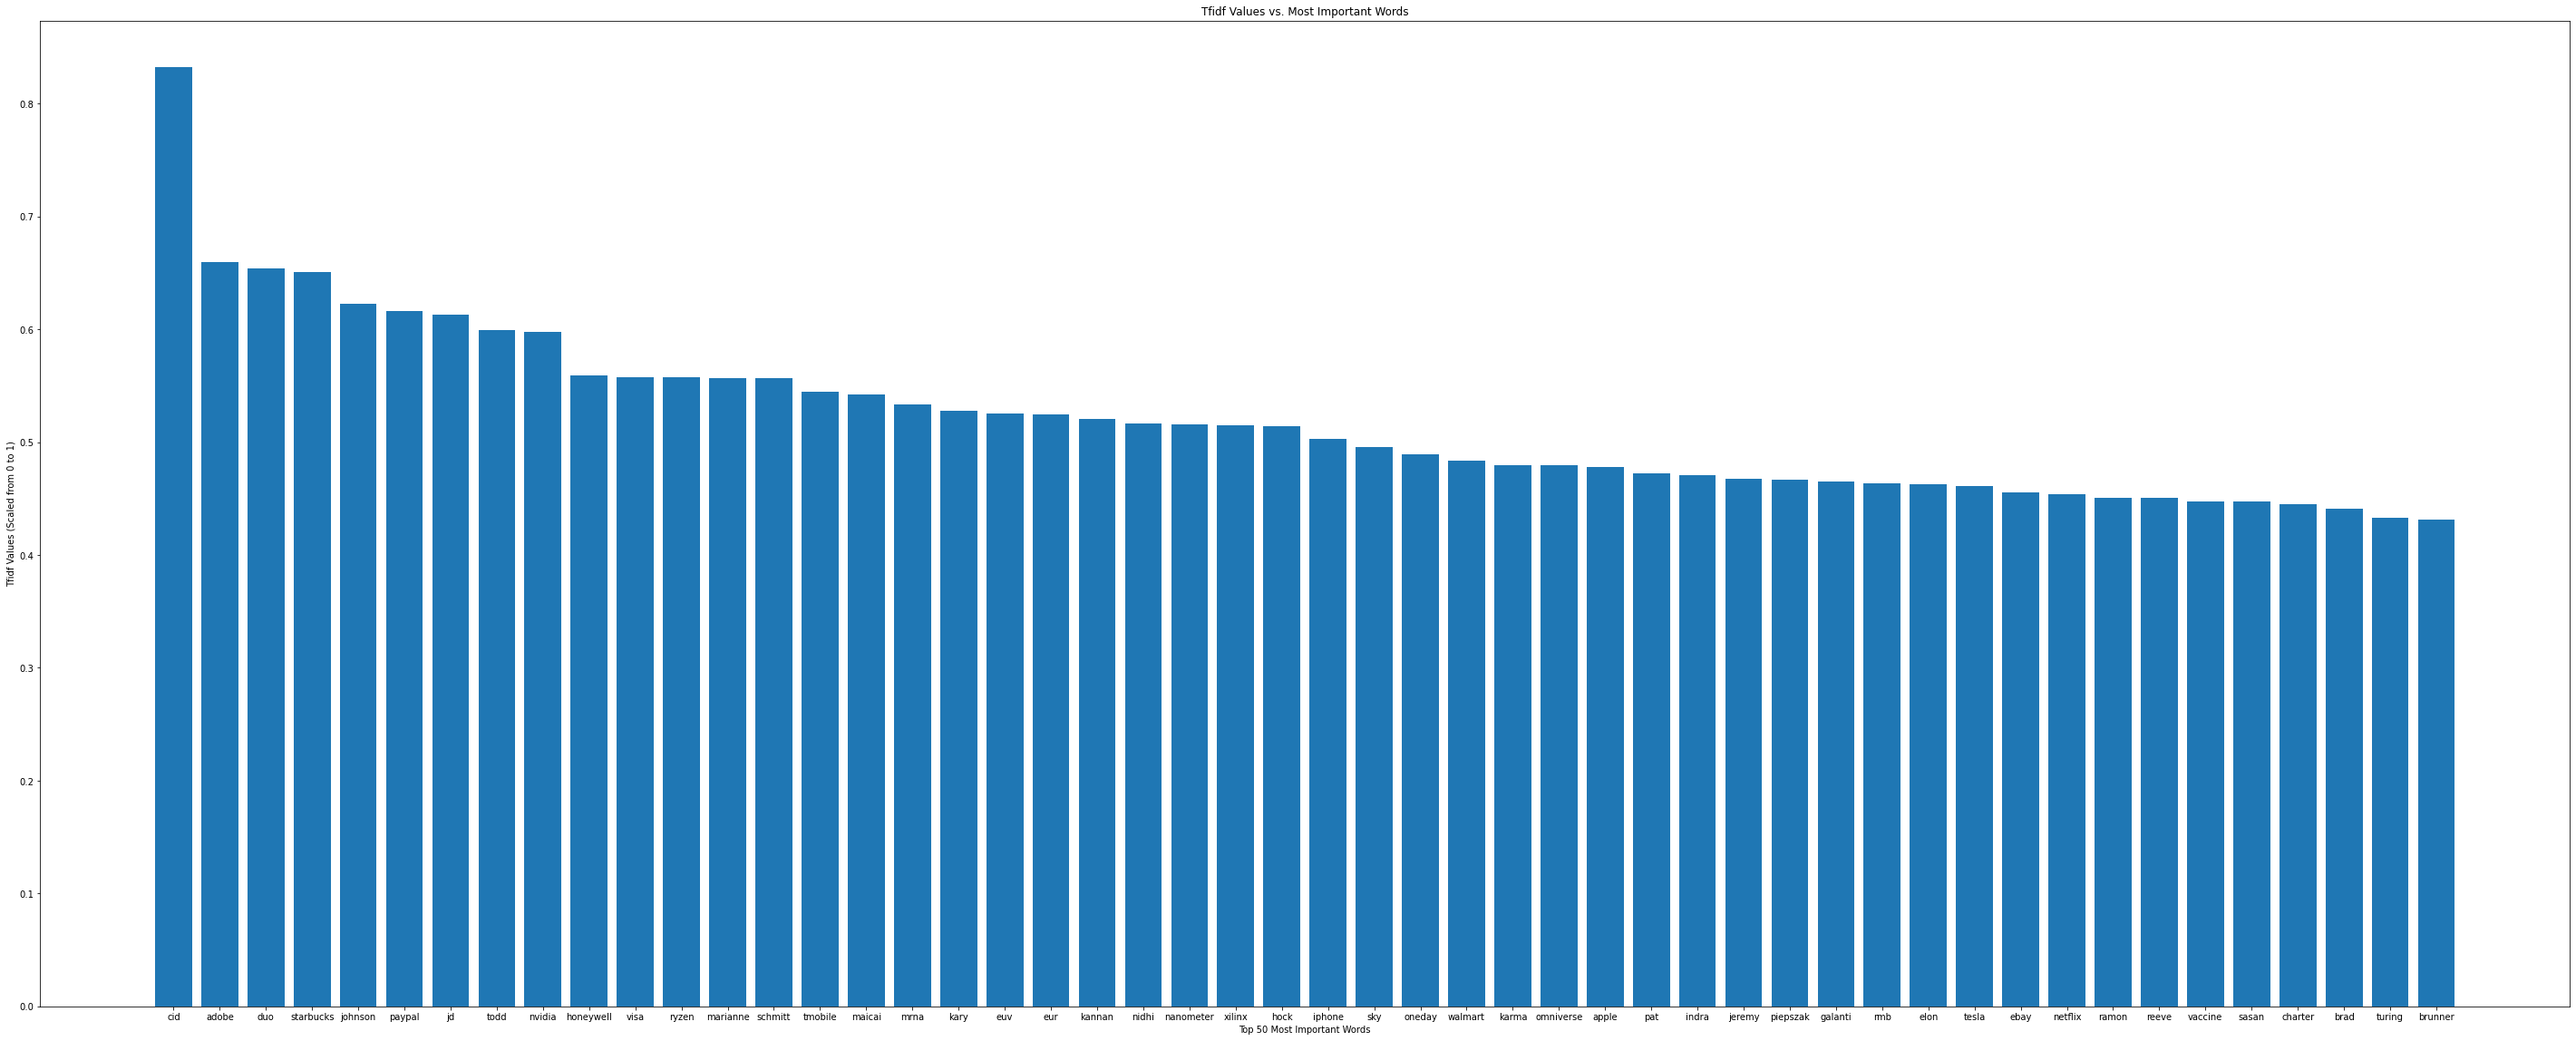

In [129]:
most_important_words_viz(tfidf_df, 50)

## 7. Principal Component Analysis

In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [81]:
def pca(bag_of_words, n_components):
    ''' PCA to reduce total number of features before feeding into ML model '''
    # instantiate the PCA object and request reduced number of components (reduces number of columns/features)
    pca = PCA(n_components=n_components, random_state=3000)

    # standardize the features so they are all on the same scale
    features_standardized = StandardScaler().fit_transform(bag_of_words.toarray())

    # transform the standardized features using the PCA algorithm 
    reduced_data = pca.fit_transform(features_standardized)

    # show transformed results in dataframe
    pca_df = pd.DataFrame(reduced_data)#, columns = components)

    ''' Obtain target values (whether stock price increased, decreased, or stayed the same) 
    from database '''
    price_changes = []
    all_transcripts = db.transcript.find()
    for transcript in all_transcripts:
        price_changes.append(transcript['price_change'])

    pca_df['target'] = price_changes 

    return pca_df

In [82]:
pca_df = pca(bag_of_words, 300)
pca_df

0          1         2          3          4         5         6  \
0    -8.290460   9.543845 -6.296340   7.773122  -2.451484 -7.125921  0.170970   
1    -7.089569   5.167643 -5.473785   6.820277  -2.494133 -8.161986  0.956989   
2    -5.674316   9.948165  2.749502   2.345286   2.738224 -9.600342  2.187183   
3    -5.482619   8.257071  5.808702  -2.607059   4.186525 -6.002953  1.703295   
4    -7.116153   2.554269 -4.770485   6.263150  -3.602788 -5.412996  0.165185   
...        ...        ...       ...        ...        ...       ...       ...   
1033 -5.741577  -4.186133  2.819458  -8.214443   5.546808 -5.396589  5.373301   
1034 -5.358312 -12.807198 -3.235170  -1.139738   3.232650 -4.542151  2.013318   
1035 -6.058486  -0.337299  9.469613 -12.457595  10.255391 -8.656015  7.096400   
1036 -0.849373 -10.229960 -2.213284   7.055193  -0.358899  0.108986  0.085193   
1037 -0.849373 -10.229960 -2.213284   7.055193  -0.358899  0.108986  0.085193   

              7         8          9  ...       291        292       293  \
0     -6.101680  2.720682  -3.059042  ...  4.837957  -2.924663 -3.290976   
1     -6.853822 -0.200596  -3.639372  ... -0.875282 -11.575606  2.447518   
2     -2.336204 -3.169070   6.375082  ...  2.079922   1.342346  1.117529   
3     -2.073636 -3.707991   7.059668  ...  2.484022   4.523945  2.330079   
4     -4.754179  2.913701  -1.524842  ...  0.000455   5.593279 -6.776190   
...         ...       ...        ...  ...       ...        ...       ...   
1033  -8.212646 -3.580222  -7.298521  ... -1.773338   0.897205 -1.284315   
1034 -10.274009 -0.996492 -10.638538  ...  1.181938  -0.981006  1.700857   
1035  -5.198334 -7.635683   0.882891  ... -1.513660   1.317807 -0.882878   
1036  -3.969253 -0.119460  -2.027243  ... -0.177604  -1.092455  1.422415   
1037  -3.969253 -0.119460  -2.027243  ... -0.177604  -1.092455  1.422415   

           294       295        296       297       298        299  target  
0    -4.178824  0.334121   0.585349 -5.529974 -1.694433  -0.568940       0  
1     1.974112 -7.532272  11.072013 -3.533332 -2.525706  14.119667       0  
2    -2.395307 -1.097855  -0.275995 -0.439635  1.261702  -0.041103       1  
3     1.390146 -2.305473  -7.050317  9.303587  6.978121  -3.079110       1  
4     1.371876 -0.354701   0.011573  2.181567 -3.491794   3.254006       0  
...        ...       ...        ...       ...       ...        ...     ...  
1033  6.537738 -1.039222  -4.493301 -5.706474 -2.789866  -0.941771       0  
1034 -3.607755 -3.464208   3.999327  6.710325  9.008802   0.715292       1  
1035  8.297211 -1.046550  -4.946980 -6.835735 -2.329024  -1.808632       0  
1036  0.374244  0.767122   1.430239  1.038480  0.186438  -0.169754       1  
1037  0.374244  0.767122   1.430239  1.038480  0.186438  -0.169754       1  

[1038 rows x 301 columns]

## 8. Base Models

In [83]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Dictionary of ML Algorithms

In [84]:
estimators = {
    'Logistic Regression' : LogisticRegression(), 
    'Support Vector Machine': LinearSVC(max_iter=1000000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()}

### Create Empty Dataframe to Store Performance Metrics

In [85]:
def metrics_df(parameters, estimators):
    # Empty lists to add estimator models and model selection types as column labels
    methods = []
    models = []

    # Add to column names using estimators dictionary
    for parameter in parameters:
        for key, value in estimators.items():
            methods.append(parameter)
            models.append(key)

    # Performance metrics for each target value (0: Decrease, 1: Increase)
    report_keys = ['0', '1']

    # Different metrics and grouping functions
    report_agg = ['macro avg', 'weighted avg']
    report_values = ['precision', 'recall', 'f1-score', 'support']

    # Initialize empty lists to add metric names
    column_idx = []
    column_metric = []

    # Add to list of row names
    # For performance metrics based off of target value (0, 1)
    for key in report_keys:
        for value in report_values:
            column_idx.append(key)
            column_metric.append(value)

    # For accuracy performance metric
    column_idx.append('all')
    column_metric.append('accuracy')

    # For aggregate performance metrics
    for agg in report_agg:
        for value in report_values:
            column_idx.append(agg)
            column_metric.append(value)
            
    # Define columns and rows (indices) for empty dataframe
    columns = [methods, models]
    indices = [column_idx, column_metric]

    # Fill dataframe with 0 values (to be replaced with actual performance metric values)
    data = [ [0] * len(methods) for _ in range(len(column_idx))]

    # Create dataframe to store evaluation metrics
    performance = pd.DataFrame(data, columns = columns, index = indices)
    return performance

In [86]:
parameters = ['Base', 'Cross-Validated GridSearch']

performance = metrics_df(parameters, estimators)
performance

Base                         \
                       Logistic Regression Support Vector Machine   
0            precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   
1            precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   
all          accuracy                    0                      0   
macro avg    precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   
weighted avg precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   

                                                           \
                       Gaussian Naive Bayes Decision Tree   
0            precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   
1            precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   
all          accuracy                     0             0   
macro avg    precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   
weighted avg precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   

                       Cross-Validated GridSearch                         \
                              Logistic Regression Support Vector Machine   
0            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
1            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
all          accuracy                           0                      0   
macro avg    precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
weighted avg precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   

                                                           
                       Gaussian Naive Bayes Decision Tree  
0

### Function to Add Evaluation Scores to Performance Dataframe

In [87]:
def metrics(method, estimator, model, predicted, y_test):
    """ method: scaling, sampling, hyperparameter tuning, etc
        estimator: different models (knn, decision tree, naive bayes)
        model: trained model from given method and estimator
        predicted: using model to run on test set and find predicitons
        y_test: actual values corresponding to predictions"""
    
    # Find predicted and expected outcomes of model
    expected = y_test
    
    # Calculate classification report corresponding to model
    report = classification_report(y_true=expected, y_pred=predicted, output_dict=True)
    
    # Initialize empty list to append and store evaluation matrix values
    data = []
    
    # Add in order of performance dataframe indices
    # Append performance scores for target values (0, 1)
    for i in range(2):
        dct = report[str(i)]
        for metric, value in dct.items():
            data.append(value)
    
    # Append accuracy score
    data.append(report['accuracy'])
    
    # Append aggregated performance scores
    report_labels = ['macro avg', 'weighted avg']
    for label in report_labels:
        for metric, value in report[label].items():
            data.append(value)
    
    # From data list, add in each value to corresponding spot in predefined performance dataframe
    for i in range(len(data)):
        performance[method, estimator].iloc[i] = data[i]

In [88]:
def base_models(estimators, pca_df):
    features = pca_df.drop("target", axis = 1)
    target = pca_df["target"]

    for estimator_name, estimator_object in estimators.items():
        # split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

        # select a classifier and create the model by fitting the training data
        model = estimator_object.fit(X=X_train, y=y_train)

        # prediction accuracy
        accuracy_test = model.score(X_test, y_test)
        accuracy_train = model.score(X_train, y_train)
        predicted = model.predict(X=X_test)
        print(estimator_name, ":")
        print("Prediction accuracy on the test data:", f"{accuracy_test:.2%}", "\n")
        print("Prediction accuracy on the train data:", f"{accuracy_train:.2%}", "\n")
        metrics('Base', estimator_name, model, predicted, y_test)

In [89]:
base_models(estimators, pca_df)

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Logistic Regression :
Prediction accuracy on the test data: 71.54% 

Prediction accuracy on the train data: 91.39% 

Support Vector Machine :
Prediction accuracy on the test data: 70.77% 

Prediction accuracy on the train data: 90.87% 

Gaussian Naive Bayes :
Prediction accuracy on the test data: 55.38% 

Prediction accuracy on the train data: 65.42% 



/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Decision Tree :
Prediction accuracy on the test data: 66.54% 

Prediction accuracy on the train data: 100.00% 



/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## 9. Hyperparameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
def grid_search(estimator, param_grid):
    """ estimator: model to test with (logistic regression, svm, guassian nb, decision tree)
        param_grid: dictionary of different parameters and values to test and compare"""
    features = pca_df.drop("target", axis = 1)
    target = pca_df["target"]
    
    # Use grid search to find best parameters
    method = estimators[estimator]
    grid_search = GridSearchCV(method, param_grid, cv=5)
    
    # Split into train and test sets, fit with grid search
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)
    model = grid_search.fit(X=X_train, y=y_train)
    
    # Print resulting best parameters and evaluation metrics
    print("Best parameters: ", grid_search.best_params_)
    
    print("Test set score: ", grid_search.score(X_test, y_test)) 
    print("Training set score: ", grid_search.score(X_train, y_train))
    
    # Evaluate performance metric
    predicted = grid_search.predict(X=X_test)
    metrics('Cross-Validated GridSearch', estimator, model, predicted, y_test)

In [92]:
# Hyperparameters for Logistic Regression
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
grid_search('Logistic Regression', param_grid)

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

Best parameters:  {'C': 0.5, 'solver': 'lbfgs'}
Test set score:  0.7115384615384616
Training set score:  0.910025706940874


/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [93]:
# Hyperparameters for SVM
param_grid = {'C': [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
grid_search('Support Vector Machine', param_grid)

Best parameters:  {'C': 0.05}
Test set score:  0.7153846153846154
Training set score:  0.9074550128534704


/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [94]:
# Hyperparameters for Naive Bayes
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search('Gaussian Naive Bayes', param_grid)

Best parameters:  {'var_smoothing': 0.1873817422860384}
Test set score:  0.5423076923076923
Training set score:  0.6246786632390745


/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [95]:
# Hyperparameters for Decision Tree
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[1, 10, 100, 120], 'min_samples_split': [2, 5, 10, 50, 100]}
grid_search('Decision Tree', param_grid)

Best parameters:  {'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 2}
Test set score:  0.6615384615384615
Training set score:  1.0


/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# 10. Model Performance

In [96]:
performance

Base                         \
                       Logistic Regression Support Vector Machine   
0            precision            0.669173               0.664122   
             recall               0.747899               0.731092   
             f1-score             0.706349               0.696000   
             support            119.000000             119.000000   
1            precision            0.763780               0.751938   
             recall               0.687943               0.687943   
             f1-score             0.723881               0.718519   
             support            141.000000             141.000000   
all          accuracy             0.715385               0.707692   
macro avg    precision            0.716476               0.708030   
             recall               0.717921               0.709518   
             f1-score             0.715115               0.707259   
             support            260.000000             260.000000   
weighted avg precision            0.720479               0.711745   
             recall               0.715385               0.707692   
             f1-score             0.715857               0.708212   
             support            260.000000             260.000000   

                                                           \
                       Gaussian Naive Bayes Decision Tree   
0            precision             0.510204      0.619403   
             recall                0.630252      0.697479   
             f1-score              0.563910      0.656126   
             support             119.000000    119.000000   
1            precision             0.610619      0.714286   
             recall                0.489362      0.638298   
             f1-score              0.543307      0.674157   
             support             141.000000    141.000000   
all          accuracy              0.553846      0.665385   
macro avg    precision             0.560412      0.666844   
             recall                0.559807      0.667888   
             f1-score              0.553608      0.665142   
             support             260.000000    260.000000   
weighted avg precision             0.564660      0.670859   
             recall                0.553846      0.665385   
             f1-score              0.552737      0.665905   
             support             260.000000    260.000000   

                       Cross-Validated GridSearch                         \
                              Logistic Regression Support Vector Machine   
0            precision                   0.666667               0.671756   
             recall                      0.739496               0.739496   
             f1-score                    0.701195               0.704000   
             support                   119.000000             119.000000   
1            precision                   0.757812               0.759690   
             recall                      0.687943               0.695035   
             f1-score                    0.721190               0.725926   
             support                   141.000000             141.000000   
all          accuracy                    0.711538               0.715385   
macro avg    precision                   0.712240               0.715723   
             recall                      0.713720               0.717266   
             f1-score                    0.711192               0.714963   
             support                   260.000000             260.000000   
weighted avg precision                   0.716096               0.719443   
             recall                      0.711538               0.715385   
             f1-score                    0.712038               0.715891   
             support                   260.000000             260.000000   

                                                           
                       Gaussian Naive Bayes Decision Tree  
0

In [43]:
# Save evaluation metrics dataframe as csv
performance.to_csv('model_evaluation.csv')

## 11. Kfold Cross-Validation

In [97]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [98]:
# produce all of the four classifiers, then can compare results and see which has the greatest accuracy 
def k_fold_cv(estimators):
    features = pca_df.drop("target", axis = 1)
    target = pca_df["target"]
    
    for estimator_name, estimator_object in estimators.items(): 
        kfold = KFold(n_splits = 20, random_state = 3000, shuffle = True)
        scores = cross_val_score(estimator = estimator_object, X=features, y=target, cv=kfold)
        print(estimator_name + ": \n\t" + f"mean accuracy={scores.mean():.2%} " + f"standard deviation={scores.std():.2%}" + "\n")

In [46]:
k_fold_cv(estimators)

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Logistic Regression: 
	mean accuracy=70.74% standard deviation=5.95%

Support Vector Machine: 
	mean accuracy=70.84% standard deviation=4.75%

Gaussian Naive Bayes: 
	mean accuracy=57.91% standard deviation=5.42%

Decision Tree: 
	mean accuracy=65.17% standard deviation=5.59%



# 12. Visualizations

In [162]:
def piedist(df, title):
    """ df: dataframe (resampling method)
        title: name of resampling method, for pie chart title """
    target_labels = {0:'Decrease in Stock Price', 1:'Increase in stock price'}
    colors = {0:'paleturquoise', 1:'darkcyan'}
    
    # Find counts for each target value
    df_target_unique = df['target'].value_counts()
    
    # Create labels for pie chart
    labels = []
    palette = []
    for index, row in zip(df_target_unique.index, df_target_unique):
        labels.append(f'{target_labels[index]}: {row}')
        palette.append(colors[index])

    # Create pie plot of target value distribution
    fig, ax = plt.subplots(figsize=(10,10))

    plt.pie(df_target_unique, labels=labels, autopct='%1.1f%%' , colors=palette)
    plt.title(f'Distribution of Target Values {title}', fontsize=15)

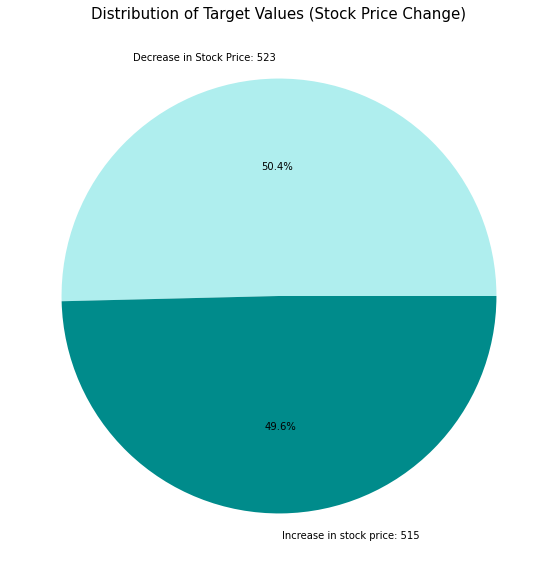

In [163]:
piedist(pca_df, '(Stock Price Change)')

In [164]:
# Query to obtain all company and transcripts
all_companies = db.transcript.find()
company_frequencies = {}

# Create dictionary of companies and their counts
for transcript in all_companies:
    if transcript['name'] not in company_frequencies:
        company_frequencies[transcript['name']] = 1
    else:
        company_frequencies[transcript['name']] += 1
        
import plotly.express as px

# Turn dictionary into dataframe
df = pd.DataFrame(list(company_frequencies.items()), columns = ['Company', 'Frequencies'])

# Generate bar chart showing company frequencies (number of earnings call transcripts per company)
fig = px.bar(df, x='Company', y='Frequencies', title = "Distribution of Companies (by Number of Transcripts)",
             color = 'Company', color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()

In [165]:
df = pd.read_csv(r'model_evaluation.csv', index_col=[0,1], header=1)
accuracies= df.loc['all', 'accuracy'].to_list()
names = df.columns.values
acc_df = pd.DataFrame(columns=names)
acc_df.loc[len(acc_df)] = accuracies

In [166]:
list_of_models = ['Base: Logistic Regression', 'Base: Support Vector Machine', 'Base: Guassian Naive Bayes', 
                  'Base: Decision Tree', 'GridSearchCV: Logistic Regression', 'GridSearchCV: Support Vector Machine', 
                  'GridSearchCV: Guassian Naive Bayes', 'GridSearchCV: Decision Tree']
import plotly.express as px
fig = px.bar(acc_df, x=list_of_models, y=accuracies, title="Accuracies of Models", color=accuracies,
             labels={'y':'Accuracies', 'x': 'Models'})
fig.show()

Text(0, 0.5, 'Percentage')

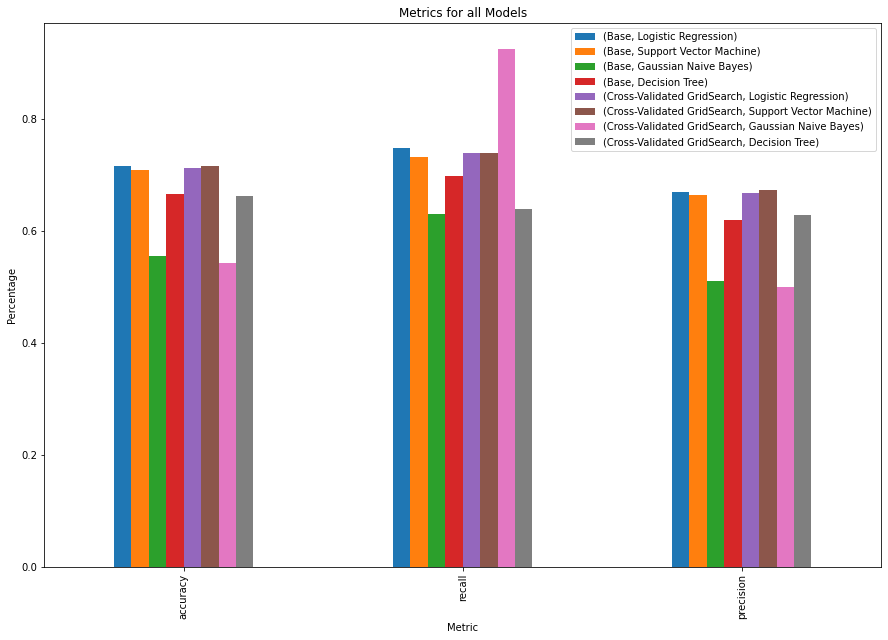

In [167]:
accuracies= performance.loc['all', 'accuracy'].to_list()
# get the different model names
names = performance.columns.values
# create an empty dataframe with the model names as the column names
metric_df = pd.DataFrame(columns=names)
# adds accuracy values to dataframe
metric_df.loc[len(metric_df)] = accuracies
# make recall row into a list
recall = performance.loc['0', 'recall'].to_list()
# adds recall values to dataframe
metric_df.loc[len(metric_df)] = recall
# make precision row into a list 
precision = performance.loc['0', 'precision'].to_list()
# adds precision to dataframe
metric_df.loc[len(metric_df)] = precision
# creates a frame with the name of the different metrics
metric_df.insert(0, 'Metric',['accuracy', 'recall', 'precision'])
# make metric column the index
metric_df.set_index('Metric', drop=True, inplace=True)
# renames columns to include cross validation
metric_df.rename(columns= {'Logistic Regression.1': 'CV Logistic Regression', 'Support Vector Machine.1': 'CV Support Vector Machine', 'Gaussian Naive Bayes.1': 'CV Gaussian Naive Bayes', 'Decision Tree.1': 'CV Decision Tree'})

# create bar chart from dataframe 
fig = metric_df.plot.bar(figsize=(15,10), title= 'Metrics for all Models')
# set label of y axis
fig.set_ylabel('Percentage')

In [168]:
def query_data_for_single_company(company_name):
    '''Get a list of texts containing all transcripts from a sepcific company'''
    #query mongo db to get transcripts from a specific company
    trancripts = db.transcript.find({"name":company_name})

    text = []
    # Load transcripts and append then to the text list
    for transcript in trancripts:
        text.append(transcript["transcript"])
            
    return text

In [169]:
def tfidf_for_single_company(text):
    ''' Tfidf vectorizer to match words to TFIDF values (min_df=1) '''
    vect = TfidfVectorizer(min_df=1, ngram_range = (1, 1)).fit(text)
    bag_of_words = vect.transform(text)
    feature_names = vect.get_feature_names()

    tfidf_df = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

    return tfidf_df, bag_of_words

In [170]:
def pca_for_single_company(bag_of_words,n_components, compnay_name):
    ''' PCA to reduce total number of features before feeding into ML model (for one company) '''
    # instantiate the PCA object and request reduced number of components (reduces number of columns/features)
    pca = PCA(n_components=n_components, random_state=3000)

    # standardize the features so they are all on the same scale
    features_standardized = StandardScaler().fit_transform(bag_of_words.toarray())

    # transform the standardized features using the PCA algorithm 
    reduced_data = pca.fit_transform(features_standardized)

    # show transformed results in dataframe
    pca_df = pd.DataFrame(reduced_data)#, columns = components)

    ''' Obtain target values (whether stock price increased, decreased, or stayed the same) 
    from database '''
    price_changes = []
    all_transcripts = db.transcript.find({"name":compnay_name}) ##load transcripts from that specific company
    for transcript in all_transcripts:
        price_changes.append(transcript['price_change'])

    pca_df['target'] = price_changes 

    return pca_df

In [171]:
def visualize_tagerts_for_each_company(company_list):
    '''Generate pie charts with 0's and 1's (targets) for each company'''
    for company in company_list:
        #get bag of words using the functions that are customized for one single company
        text_per_compnay = query_data_for_single_company(company)
        tfidf_df_per_company, bag_of_words_per_company = tfidf_for_single_company(text_per_compnay)
        
        # assign the number of features for each company as the number of components for PCA
        index = tfidf_df_per_company.index
        num_features = len(index)
        pca_df_per_company = pca_for_single_company(bag_of_words_per_company,num_features,company)
        # use our built-in pie chart generating function to generate pie chart for each company
        title = 'for ' + company + ' (Stock Price Change)'
        piedist(pca_df_per_company, title)

/var/folders/f8/d4gwjvws74db26qzz416hhj80000gn/T/ipykernel_854/2047556409.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



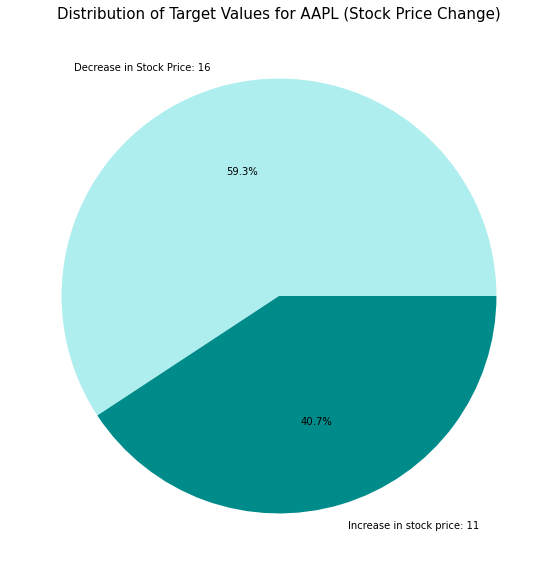

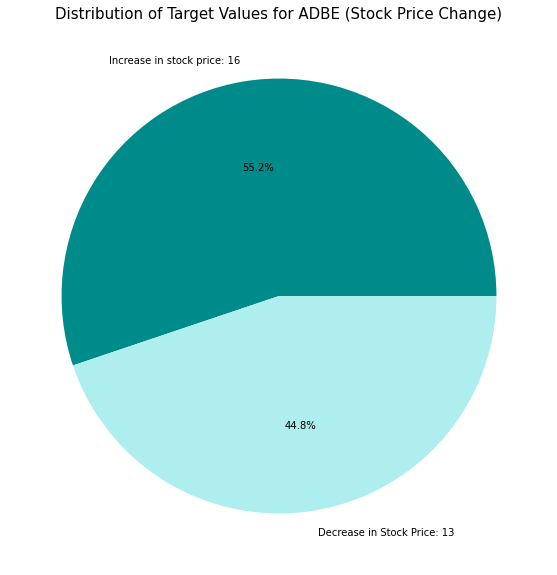

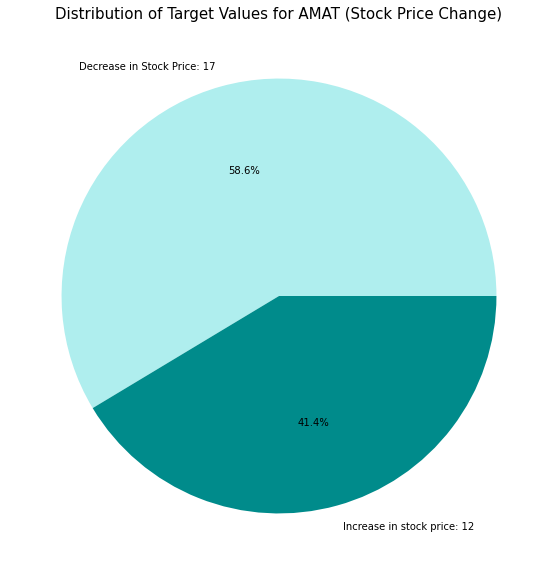

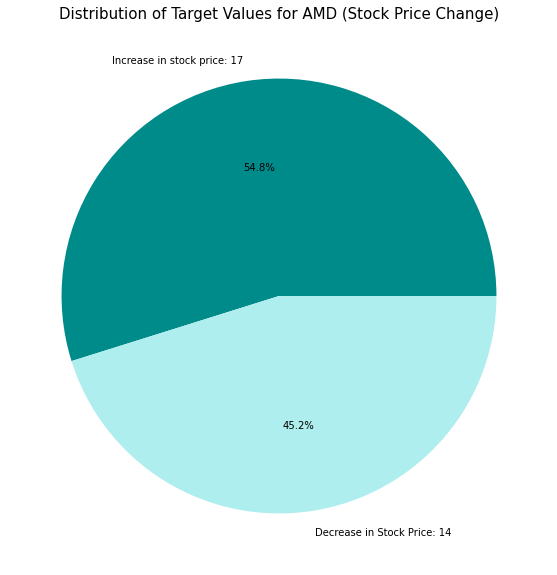

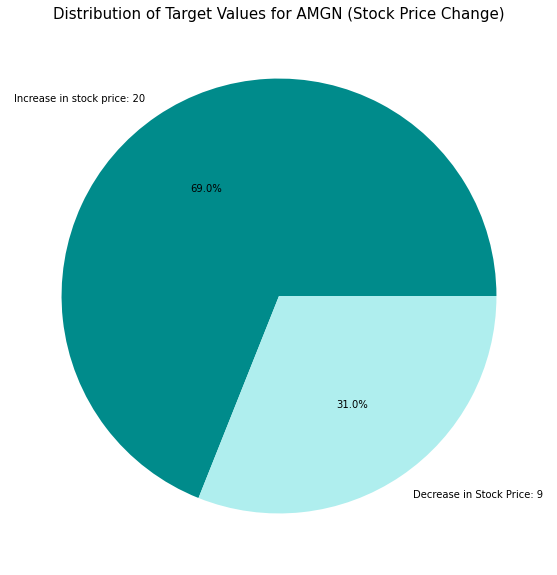

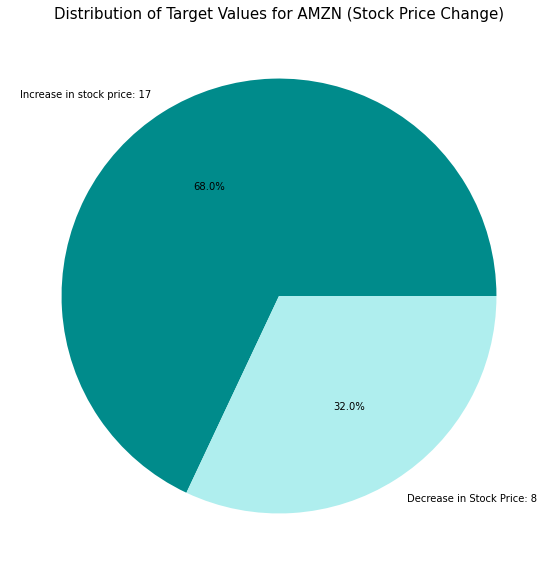

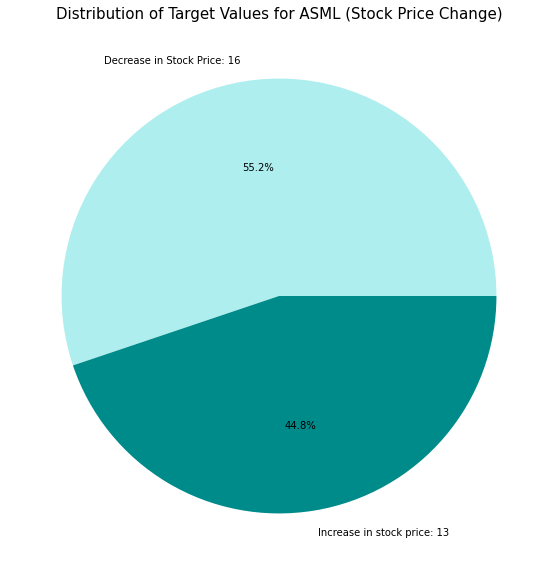

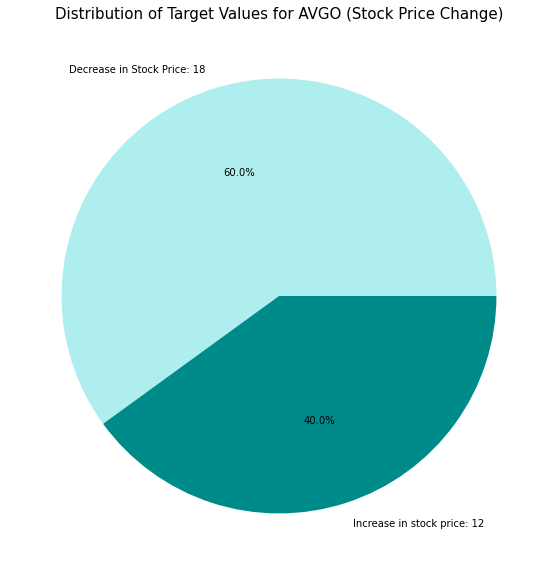

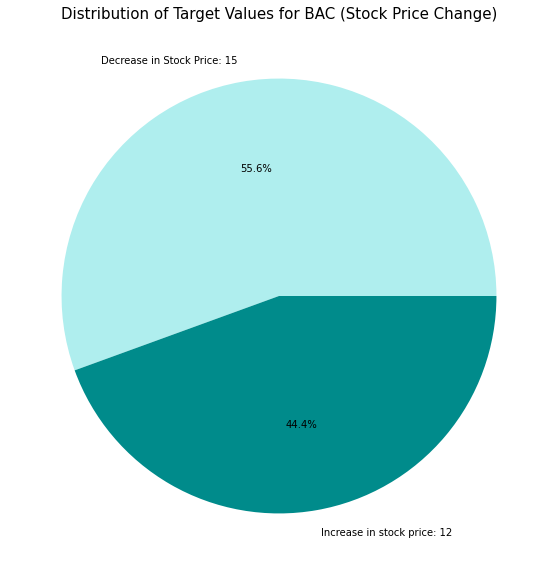

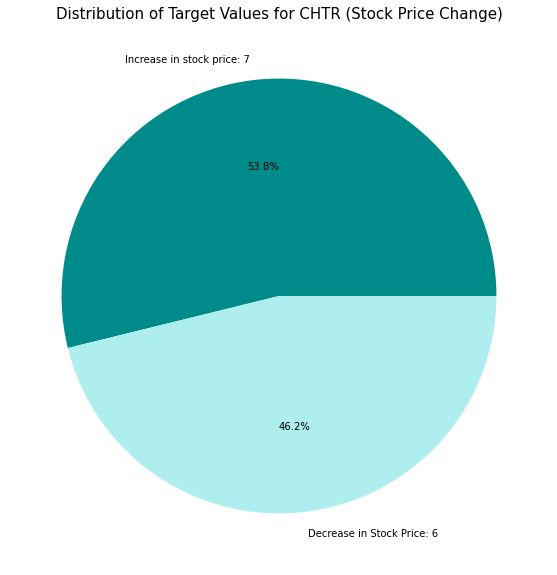

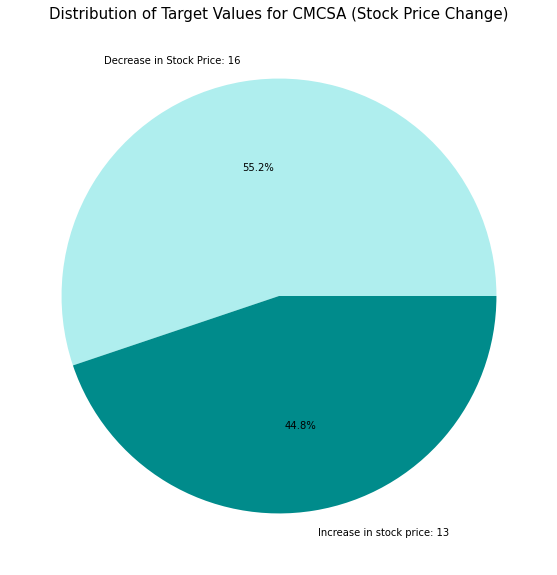

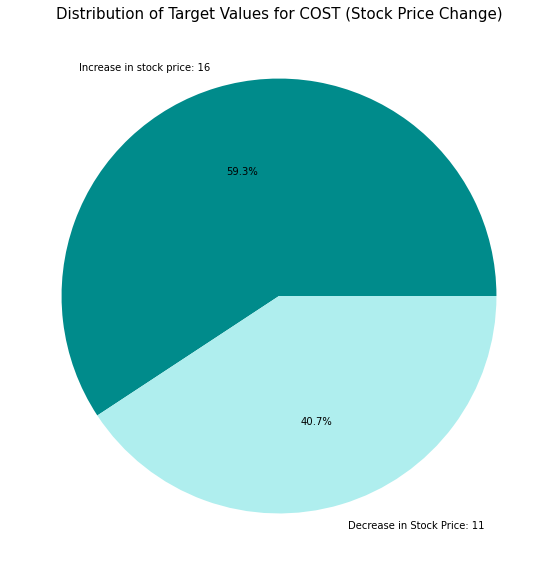

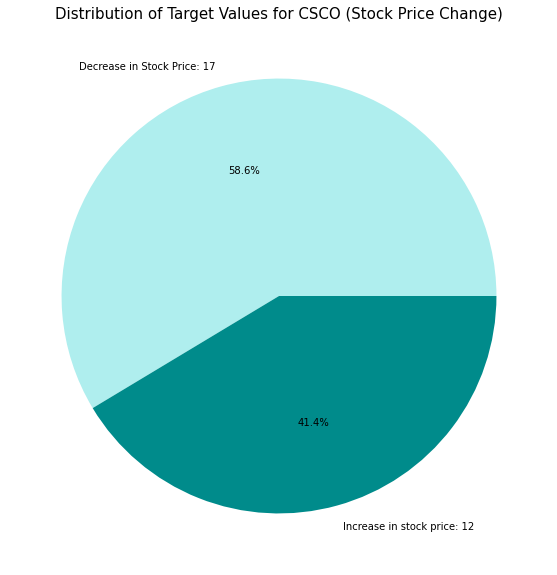

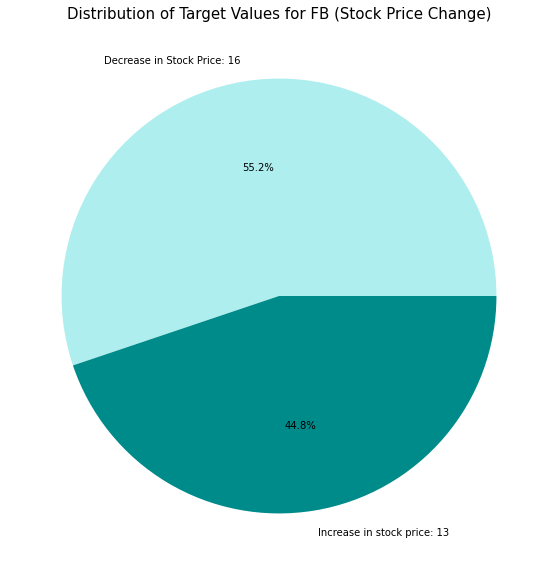

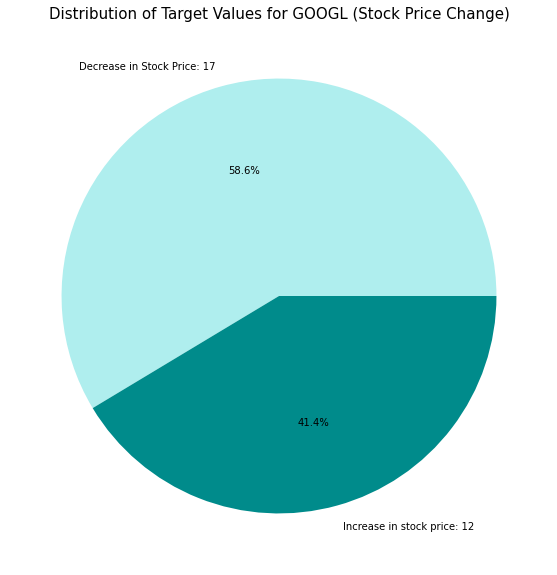

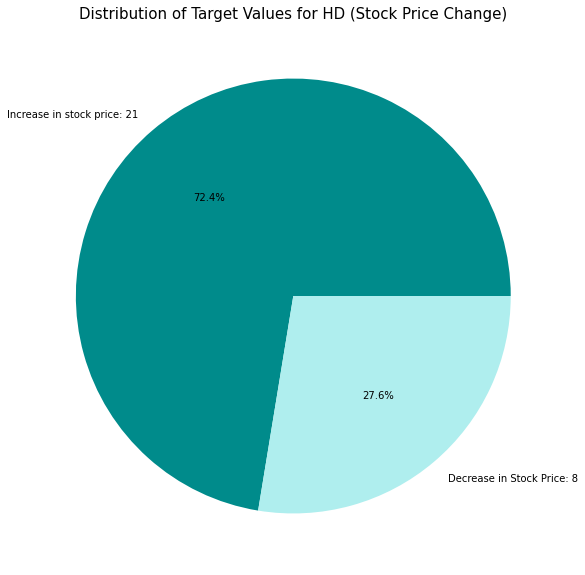

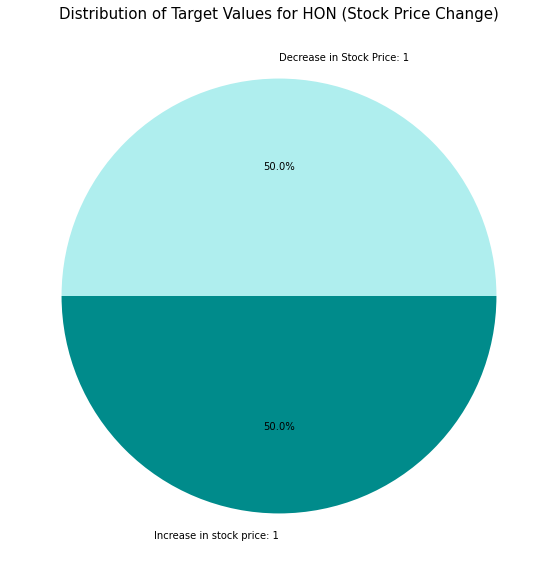

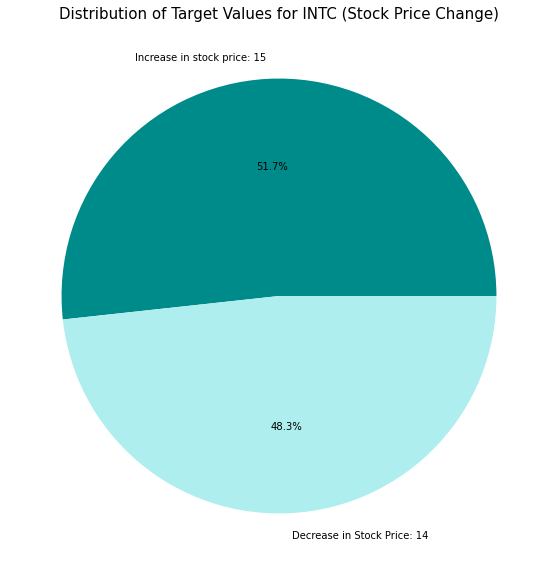

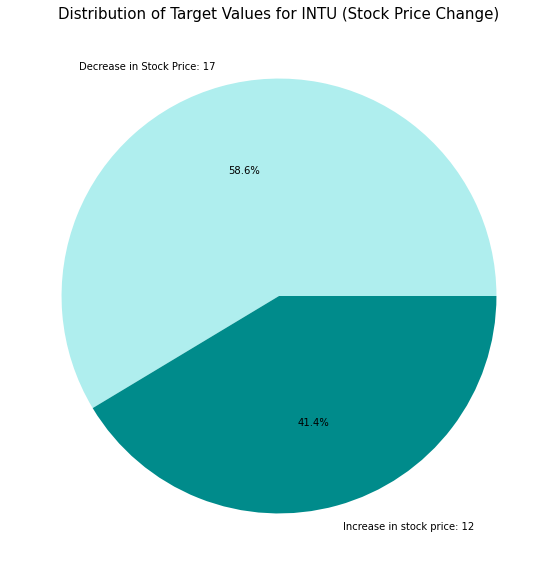

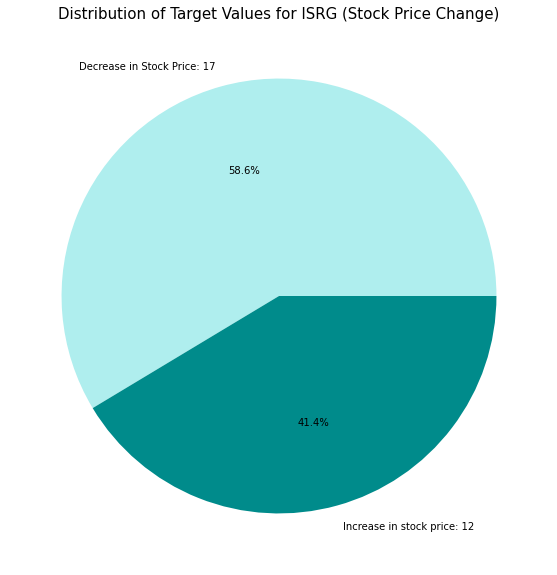

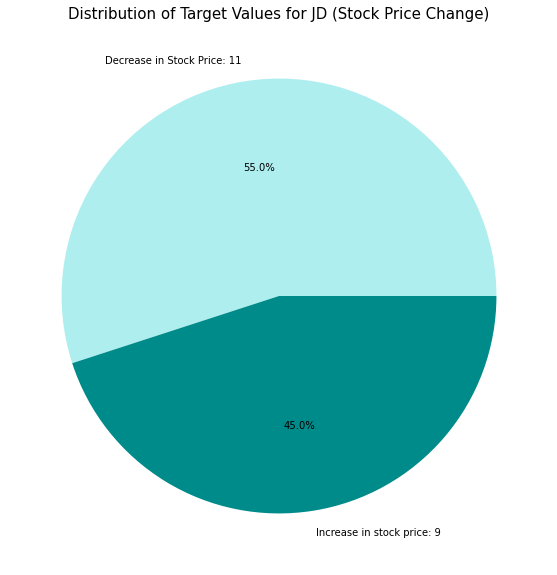

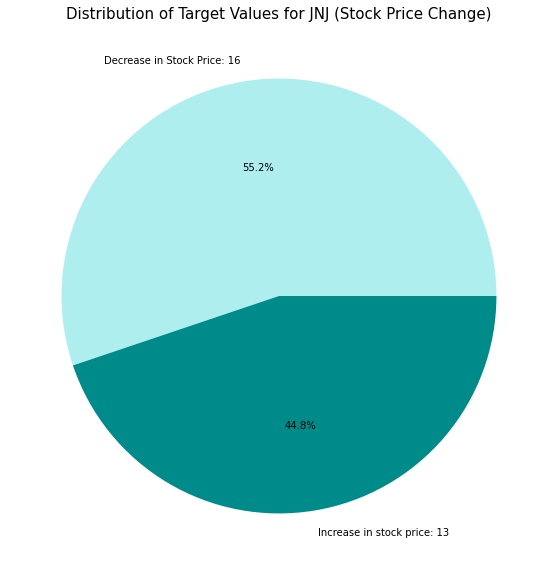

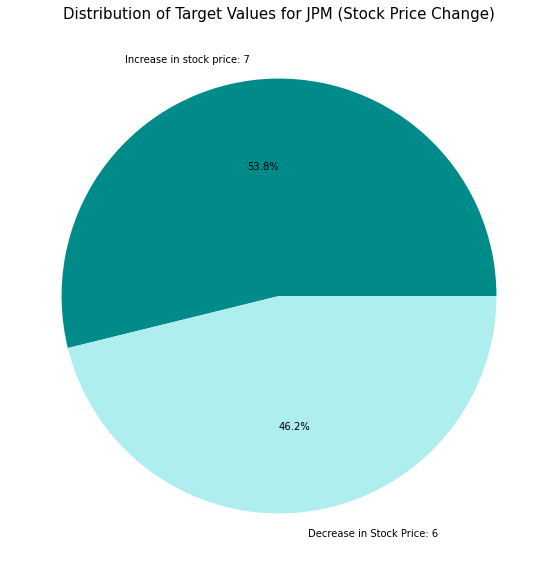

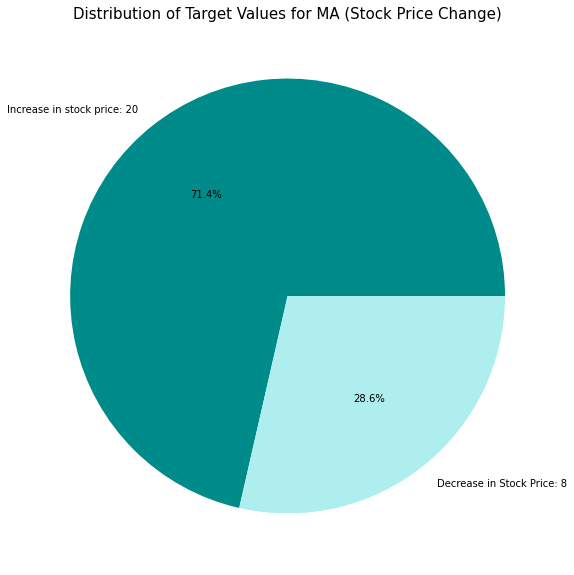

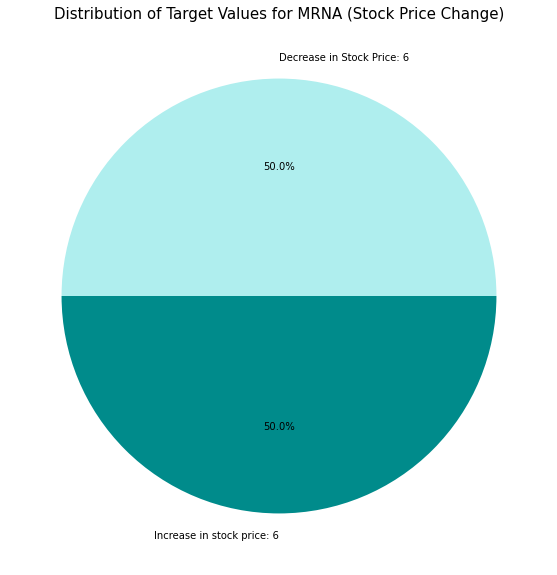

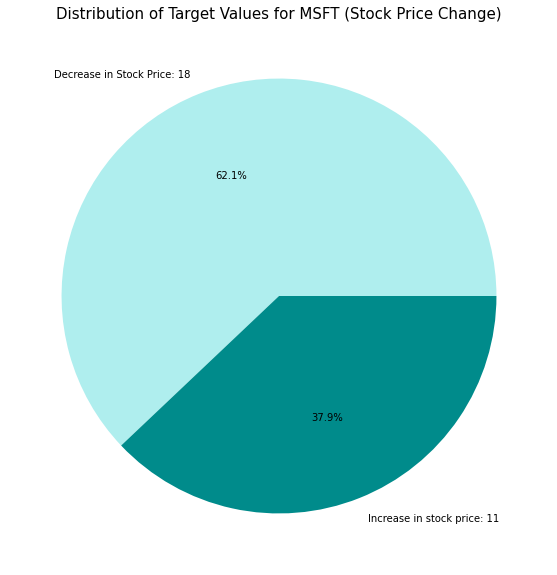

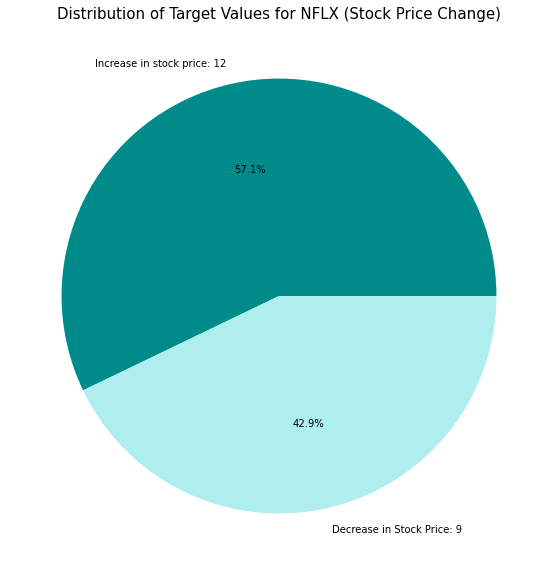

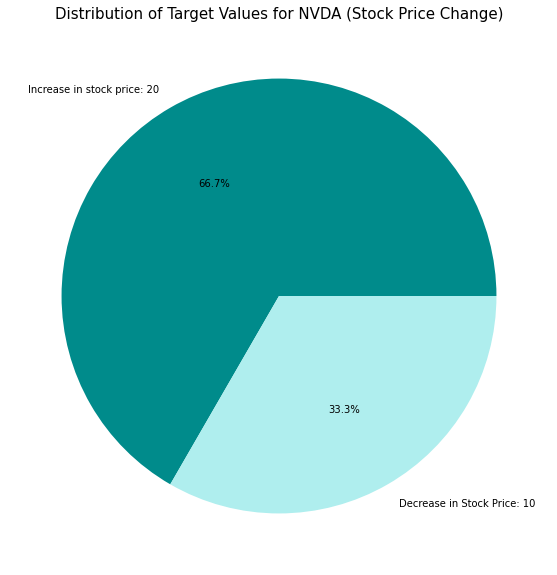

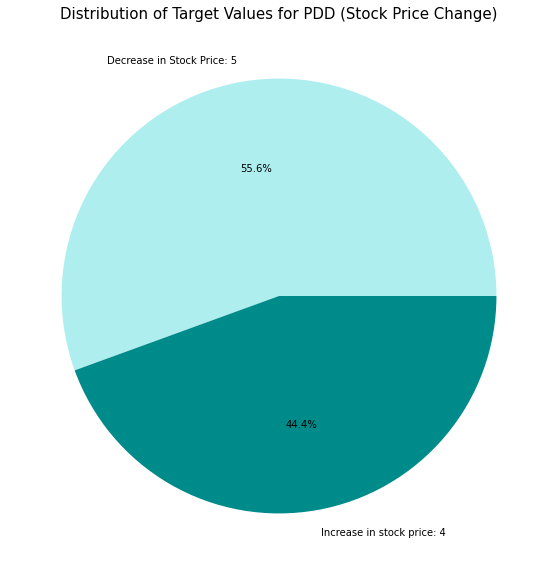

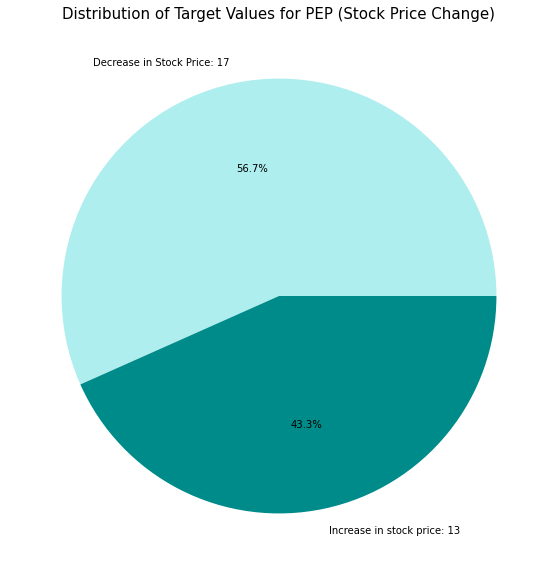

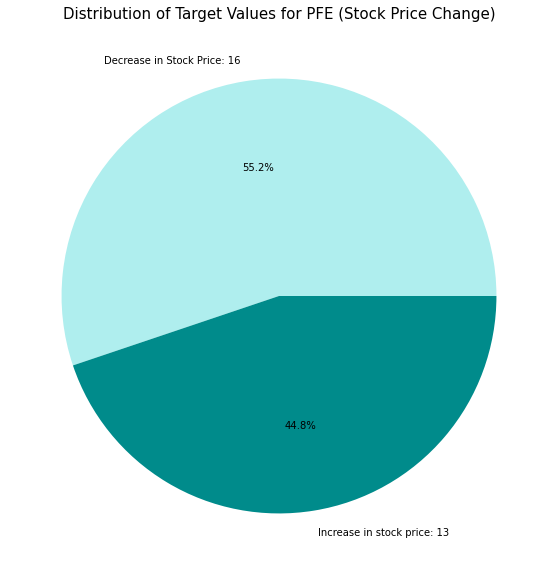

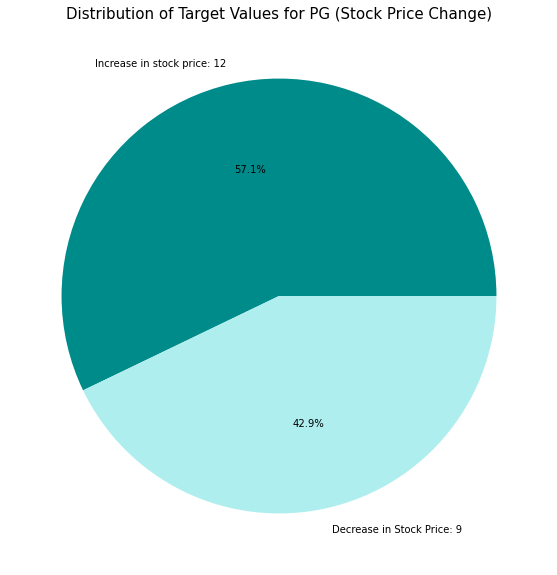

In [172]:
companies = ['AAPL', 'ADBE', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ASML', 'AVGO', 'BAC', 'CHTR', 
           'CMCSA', 'COST',  'CSCO', 'FB', 'GOOGL', 'HD', 'HON', 'INTC', 'INTU', 'ISRG',
           'JD', 'JNJ', 'JPM', 'MA', 'MRNA', 'MSFT', 'NFLX', 'NVDA', 'PDD', 'PEP', 'PFE', 
           'PG']
#call visuliazation function
visualize_tagerts_for_each_company(companies)

# 15. Example

In [111]:
class TranscriptsExample:
    def __init__(self, ticker):
        self.ticker = ticker
        xinyu = "/Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project"
        marco = "C:/Users/mtort/Repositories/DS3500-Final-Project"
        emily = "/Users/emilywang/Desktop/DS3500-Final-Project-main-2"
        kelly = "/Users/kelly/Desktop/ds3500/DS3500-Final-Project"
        qi = ""
        self.path = xinyu + "/transcripts/"+ticker+"_transcripts/"

    def read_files(self):
        return [f for f in listdir(self.path) if isfile(join(self.path, f))]

    def create_dct(self):
        lst_files = self.read_files()
        lst_cleaned = []
        for file in lst_files:
            file_path = self.path + file
            if file_path[-3:] == 'pdf':
                txt = PdfCleaner(file_path)
                date = file[:8]
                txt_cleaned = txt.clean_nums()
                PerfTest = PerformanceTester()
                PerfTest.setTimeframe('day', 1)
                PerfTest.loadArticles([[self.ticker, date, txt_cleaned]])
                try:
                    classification_xy = PerfTest.aquireTargetValues()
                except KeyError:
                    print(f'''Warning: attempted to access market during weekend or after hours
                          Earnings Transcript {file_path} Not Added
                          ''')
                    continue
                dct_cleaned = {'price_change': classification_xy[1][0], 'name': self.ticker, 'date': date, 'transcript': txt_cleaned}
                lst_cleaned.append(dct_cleaned)
        return lst_cleaned

In [112]:
class DatabaseExample:
    def __init__(self):
        client = MongoClient()
        self.db = client.transcripts

    def store_data(self, tickers_lst):
        for t in tickers_lst:
            store = Transcripts(t)
            transcript = store.create_dct()
            self.db.transcript.insert_many(transcript)
            print(t + " transcripts stored successfully")
        return self.db

In [113]:
''' To prevent "IOPub data rate exceeded error":
enter into terminal: jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 '''

example_ticker = ['SBUX']

example_database = DatabaseExample()
example_db = example_database.store_data(example_ticker)

SBUX transcripts stored successfully


In [114]:
example_data, example_text = query_data()
example_tfidf_df, example_bag_of_words = tfidf(example_text)

aa  aaa  aacr  aaos      aapl  aaron  aarp   ab  abandon  abandoned  \
0     0.0  0.0   0.0   0.0  0.196699    0.0   0.0  0.0      0.0        0.0   
1     0.0  0.0   0.0   0.0  0.179739    0.0   0.0  0.0      0.0        0.0   
2     0.0  0.0   0.0   0.0  0.119457    0.0   0.0  0.0      0.0        0.0   
3     0.0  0.0   0.0   0.0  0.118842    0.0   0.0  0.0      0.0        0.0   
4     0.0  0.0   0.0   0.0  0.200450    0.0   0.0  0.0      0.0        0.0   
...   ...  ...   ...   ...       ...    ...   ...  ...      ...        ...   
1035  0.0  0.0   0.0   0.0  0.000000    0.0   0.0  0.0      0.0        0.0   
1036  0.0  0.0   0.0   0.0  0.000000    0.0   0.0  0.0      0.0        0.0   
1037  0.0  0.0   0.0   0.0  0.000000    0.0   0.0  0.0      0.0        0.0   
1038  0.0  0.0   0.0   0.0  0.000000    0.0   0.0  0.0      0.0        0.0   
1039  0.0  0.0   0.0   0.0  0.000000    0.0   0.0  0.0      0.0        0.0   

      ...  ﬂuctuations      ﬂuid  ﬂuidity  ﬂush  ﬂushed  ﬂux   ﬂy  ﬂyer  \
0     ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
1     ...     0.007147  0.008565      0.0   0.0     0.0  0.0  0.0   0.0   
2     ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
3     ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
4     ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
...   ...          ...       ...      ...   ...     ...  ...  ...   ...   
1035  ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
1036  ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
1037  ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
1038  ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   
1039  ...     0.000000  0.000000      0.0   0.0     0.0  0.0  0.0   0.0   

      ﬂying   ﬂywheel  
0       0.0  0.000000  
1       0.0  0.000000  
2       0.0  0.000000  
3       0.0  0.000000  
4       0.0  0.000000  
...     ...       ...  
1035    0.0  0.000000  
1036    0.0  0.007162  
1037    0.0  0.007162  
1038    0.0  0.007162  
1039    0.0  0.007162  

[1040 rows x 21619 columns]

In [115]:
example_pca_df = pca(example_bag_of_words, 300)

In [116]:
starbucks_pca_df = example_pca_df.tail(1)
starbucks_pca_df

0          1         2          3         4         5         6  \
1039 -1.295004 -14.206395 -2.475677  11.002424 -0.478256 -0.184015  0.689788   

             7         8         9  ...       291       292       293  \
1039 -7.901882 -0.952801 -2.886516  ...  0.126514 -0.296789  0.346367   

          294       295       296       297      298      299  target  
1039  0.06906 -0.024923  0.107289  0.045417  0.13605 -0.04108       1  

[1 rows x 301 columns]

In [117]:
example_pca_df = example_pca_df[:-1]
example_pca_df

0          1         2          3          4         5         6  \
0    -8.288976   9.500147 -6.133147   7.980710  -2.476902 -7.108168  0.140813   
1    -7.093462   5.128654 -5.343783   6.971021  -2.521855 -8.143570  0.925544   
2    -5.671919   9.948404  2.763518   2.355805   2.745041 -9.591445  2.182591   
3    -5.483016   8.306130  5.731553  -2.665722   4.204510 -5.996790  1.708120   
4    -7.104459   2.471686 -4.641778   6.432659  -3.643932 -5.407225  0.147792   
...        ...        ...       ...        ...        ...       ...       ...   
1034 -5.349096 -12.805723 -3.267993  -1.076611   3.172411 -4.482537  1.964199   
1035 -6.056438  -0.171681  9.190528 -12.661269  10.254862 -8.614462  7.076221   
1036 -1.295004 -14.206395 -2.475677  11.002424  -0.478256 -0.184015  0.689788   
1037 -1.295004 -14.206395 -2.475677  11.002424  -0.478256 -0.184015  0.689788   
1038 -1.295004 -14.206395 -2.475677  11.002424  -0.478256 -0.184015  0.689788   

              7         8          9  ...       291        292       293  \
0     -6.033608  2.839108  -3.060451  ... -4.677397  -3.291623 -3.372895   
1     -6.846575 -0.056090  -3.635566  ...  0.030406 -11.386922  4.122343   
2     -2.362886 -3.099415   6.430896  ... -1.251316   1.395514  0.648259   
3     -2.139123 -3.664894   7.093275  ... -3.741759   5.204985  1.633326   
4     -4.750518  2.984195  -1.594772  ... -0.175919   4.737767 -6.837622   
...         ...       ...        ...  ...       ...        ...       ...   
1034 -10.355526 -0.849540 -10.622999  ... -2.529573  -1.206562  0.877793   
1035  -5.384188 -7.560077   0.933031  ...  1.010528   1.517074  0.364883   
1036  -7.901882 -0.952801  -2.886516  ...  0.126514  -0.296789  0.346367   
1037  -7.901882 -0.952801  -2.886516  ...  0.126514  -0.296789  0.346367   
1038  -7.901882 -0.952801  -2.886516  ...  0.126514  -0.296789  0.346367   

           294       295       296       297       298        299  target  
0    -2.950705  2.148454 -3.484639 -2.805214 -3.552552  -1.740618       0  
1    -0.031043 -9.523647 -4.306317 -9.358557 -1.137880  15.317524       0  
2    -2.477480 -0.312030 -1.807845  1.011406  0.581548  -0.291879       1  
3     0.141630 -0.413375  3.268015  9.967184  8.166785  -1.918999       1  
4     1.951296 -1.168501  2.890002 -0.954924 -1.644442   4.074870       0  
...        ...       ...       ...       ...       ...        ...     ...  
1034 -6.776963 -4.510002  3.686644  1.047520  9.970663   1.485765       1  
1035  9.111080 -0.065876 -3.796856  2.115944 -5.679450  -3.413885       0  
1036  0.069060 -0.024923  0.107289  0.045417  0.136050  -0.041080       1  
1037  0.069060 -0.024923  0.107289  0.045417  0.136050  -0.041080       1  
1038  0.069060 -0.024923  0.107289  0.045417  0.136050  -0.041080       1  

[1039 rows x 301 columns]

In [119]:
example_features = example_pca_df.drop("target", axis = 1)
example_target = example_pca_df["target"]
X_train, X_test, y_train, y_test = train_test_split(example_features, example_target, random_state=3000)
example_model = LogisticRegression().fit(X=X_train, y=y_train)

accuracy_test = example_model.score(X_test, y_test)
accuracy_train = example_model.score(X_train, y_train)
predicted = example_model.predict(X=X_test)
print("Logistic Regression:")
print("Prediction accuracy on the test data:", f"{accuracy_test:.2%}", "\n")
print("Prediction accuracy on the train data:", f"{accuracy_train:.2%}", "\n")

Logistic Regression:
Prediction accuracy on the test data: 70.77% 

Prediction accuracy on the train data: 93.32% 



/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
example_model.predict(X=starbucks_pca_df.drop("target", axis=1))

array([1])

# 16. Pickle Model

In [122]:
import pickle

In [ ]:
pickle.dump(final_model, open('model.pkl','wb'))